#### Loading The Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scipy
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import pylab
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan,het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Importing the Train and Test DataSets

In [3]:
train = pd.read_excel("UsedCars_Train.xlsx")
test = pd.read_excel("UsedCars_Test.xlsx")

#### Reading the first 5 rows of the train dataset

In [4]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


#### Reading the first 5 rows of the test dataset

In [5]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


#### Displaying the information of the train dataset

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


### Cleaning The DataSet - Null Value Imputation

#### Checking the number of null values in each column of the train dataset

In [7]:
train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [8]:
train[train.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [9]:
train.Mileage.nunique()

442

In [10]:
train.Mileage.value_counts()

18.9 kmpl      172
17.0 kmpl      172
18.6 kmpl      119
20.36 kmpl      88
21.1 kmpl       86
17.8 kmpl       85
16.0 kmpl       76
12.8 kmpl       72
20.0 kmpl       70
18.0 kmpl       69
0.0 kmpl        68
18.5 kmpl       67
13.0 kmpl       67
22.7 kmpl       66
15.1 kmpl       64
16.8 kmpl       59
16.47 kmpl      58
12.99 kmpl      58
23.1 kmpl       52
25.8 kmpl       51
22.32 kmpl      50
22.9 kmpl       47
19.7 kmpl       47
16.1 kmpl       45
24.3 kmpl       43
17.5 kmpl       43
13.5 kmpl       42
24.0 kmpl       41
15.0 kmpl       41
11.5 kmpl       41
              ... 
8.45 kmpl        1
14.45 kmpl       1
14.57 kmpl       1
19.44 kmpl       1
17.84 kmpl       1
18.18 kmpl       1
10.6 kmpl        1
14.83 kmpl       1
25.5 kmpl        1
8.5 kmpl         1
18.23 kmpl       1
13.58 kmpl       1
17.16 kmpl       1
14.33 kmpl       1
8.0 kmpl         1
16.38 kmpl       1
19.83 kmpl       1
23.03 kmpl       1
15.11 kmpl       1
23.19 kmpl       1
14.59 kmpl       1
12.97 kmpl  

In [11]:
x = train.Mileage.str.replace("kmpl","")

In [12]:
mileage = x.str.replace("km/kg","")

In [13]:
train["mileage"] = mileage

In [14]:
train.drop("Mileage",axis=1,inplace=True)

In [15]:
test["mileage"] = mileage

In [16]:
test.drop("Mileage",axis=1,inplace=True)

In [17]:
train.mileage.isnull().sum()

2

In [18]:
train.mileage.median()

18.15

In [19]:
train.mileage.replace(np.NaN,18.15,inplace=True)

In [20]:
train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
mileage                 0
dtype: int64

In [21]:
train.Engine.value_counts()

1197 CC    606
1248 CC    512
1498 CC    304
998 CC     259
2179 CC    240
1497 CC    229
1198 CC    227
1968 CC    216
1995 CC    183
1461 CC    152
2143 CC    149
1582 CC    145
1199 CC    143
1598 CC    141
1396 CC    139
796 CC     129
2494 CC    121
1086 CC    108
1591 CC     94
2993 CC     90
1399 CC     88
2982 CC     86
1798 CC     85
2987 CC     67
2967 CC     61
814 CC      59
1120 CC     54
1196 CC     50
1364 CC     47
1493 CC     47
          ... 
1242 CC      2
5000 CC      2
3436 CC      2
2706 CC      1
3200 CC      1
970 CC       1
2149 CC      1
2487 CC      1
72 CC        1
2773 CC      1
2349 CC      1
2092 CC      1
1489 CC      1
1978 CC      1
2112 CC      1
2495 CC      1
1422 CC      1
1797 CC      1
2999 CC      1
4951 CC      1
1948 CC      1
5204 CC      1
1468 CC      1
2925 CC      1
5998 CC      1
2147 CC      1
2720 CC      1
2694 CC      1
2995 CC      1
3197 CC      1
Name: Engine, Length: 146, dtype: int64

In [22]:
train.Engine.unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [23]:
train.Engine.isnull().sum()

36

In [24]:
train.Engine.mode()

0    1197 CC
dtype: object

In [25]:
train.Engine.replace(np.NaN,"1197 CC",inplace=True)

In [26]:
train.Engine.isnull().sum()

0

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Engine               6019 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
mileage              6019 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [28]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,58.16 bhp,5.0,NaN,1.75,26.6
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.2
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,NaN,17.74,15.2


In [29]:
train.Seats.isnull().sum()

42

In [30]:
train.Seats.mode()

0    5.0
dtype: float64

In [31]:
train.Seats.fillna(5.0,inplace=True)

In [32]:
train.Seats.isnull().sum()

0

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Engine               6019 non-null object
Power                5983 non-null object
Seats                6019 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
mileage              6019 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [34]:
train["mileage"] = train.mileage.astype(float)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Engine               6019 non-null object
Power                5983 non-null object
Seats                6019 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
mileage              6019 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 611.4+ KB


In [36]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,58.16 bhp,5.0,NaN,1.75,26.60
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20


In [37]:
train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Engine                  0
Power                  36
Seats                   0
New_Price            5195
Price                   0
mileage                 0
dtype: int64

In [38]:
power = train.Power.str.replace("bhp","")

In [39]:
power.reset_index()

,index,Power
0,0,58.16
1,1,126.2
2,2,88.7
3,3,88.76
4,4,140.8
5,5,55.2
6,6,63.1
7,7,171.5
8,8,103.6
9,9,74


In [40]:
train.drop("Power",axis=1,inplace=True)

In [41]:
train["power"] = power

In [42]:
train.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,New_Price,Price,mileage,power
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,5.0,NaN,1.75,26.60,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,5.0,NaN,12.50,19.67,126.2


In [43]:
train.power.isnull().sum()

36

In [44]:
train.power.replace("null ",np.NaN,inplace=True)

In [45]:
train.power.median()

97.7

In [46]:
train.power.replace(np.NaN,97.7,inplace=True)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Engine               6019 non-null object
Seats                6019 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
mileage              6019 non-null float64
power                6019 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 611.4+ KB


In [48]:
train.New_Price.isnull().sum()

5195

#### Feature Engineering

In [49]:
# Making a new column of the name "Age" of the car through Featuring Engineering and subtracting year by present year.

In [50]:
train["Age"] = 2019-train.Year

In [51]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,New_Price,Price,mileage,power,Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,5.0,NaN,1.75,26.60,58.16,9
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,5.0,NaN,12.50,19.67,126.2,4
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,5.0,8.61 Lakh,4.50,18.20,88.7,8
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,7.0,NaN,6.00,20.77,88.76,7
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,5.0,NaN,17.74,15.20,140.8,6


In [52]:
# Making a new column of the name "Brand" of the car through Featuring Engineering by indexing the first four letters of 
# the name.

In [53]:
train["Brand"] = train.Name.str[:4]

In [54]:
train.Brand.unique()

array(['Maru', 'Hyun', 'Hond', 'Audi', 'Niss', 'Toyo', 'Volk', 'Tata',
       'Land', 'Mits', 'Rena', 'Merc', 'BMW ', 'Mahi', 'Ford', 'Pors',
       'Dats', 'Jagu', 'Volv', 'Chev', 'Skod', 'Mini', 'Fiat', 'Jeep',
       'Smar', 'Amba', 'Isuz', 'ISUZ', 'Forc', 'Bent', 'Lamb'],
      dtype=object)

In [55]:
train.Brand.nunique()

31

In [56]:
train.Brand.value_counts()

Maru    1211
Hyun    1107
Hond     608
Toyo     411
Merc     318
Volk     315
Ford     300
Mahi     272
BMW      267
Audi     236
Tata     186
Skod     173
Rena     145
Chev     121
Niss      91
Land      60
Jagu      40
Fiat      28
Mits      27
Mini      26
Volv      21
Pors      18
Jeep      15
Dats      13
Forc       3
ISUZ       2
Isuz       1
Bent       1
Amba       1
Lamb       1
Smar       1
Name: Brand, dtype: int64

In [57]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,New_Price,Price,mileage,power,Age,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,5.0,NaN,1.75,26.60,58.16,9,Maru
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,5.0,NaN,12.50,19.67,126.2,4,Hyun
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,5.0,8.61 Lakh,4.50,18.20,88.7,8,Hond
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,7.0,NaN,6.00,20.77,88.76,7,Maru
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,5.0,NaN,17.74,15.20,140.8,6,Audi


In [58]:
# Feature engineering of Engine - remove CC and groupby with price and mileage and try to relate and see correlation and 
# lineplot, Drop engine after making features high cc, medium cc and small cc. Check for loaction with price and then keep
# two or three and then put others as "Other".

In [59]:
train.Engine= train.Engine.str.replace("CC","")

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Engine               6019 non-null object
Seats                6019 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
mileage              6019 non-null float64
power                6019 non-null object
Age                  6019 non-null int64
Brand                6019 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 705.4+ KB


In [61]:
train.Engine = train.Engine.astype(int)

In [62]:
train.Engine.describe()

count    6019.000000
mean     1618.738827
std       600.445858
min        72.000000
25%      1197.000000
50%      1493.000000
75%      1969.000000
max      5998.000000
Name: Engine, dtype: float64

In [63]:
bins = [0,1000,2100,6000]
train["Engine_CC_Category"] = pd.cut(train.Engine,bins,labels=["Low","Medium","High"])

In [64]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,New_Price,Price,mileage,power,Age,Brand,Engine_CC_Category
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998,5.0,NaN,1.75,26.60,58.16,9,Maru,Low
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582,5.0,NaN,12.50,19.67,126.2,4,Hyun,Medium
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199,5.0,8.61 Lakh,4.50,18.20,88.7,8,Hond,Medium
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248,7.0,NaN,6.00,20.77,88.76,7,Maru,Medium
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,5.0,NaN,17.74,15.20,140.8,6,Audi,Medium


In [65]:
train["new_price"] = train.New_Price.str.replace(" Lakh","")

In [66]:
train.drop("New_Price",axis=1,inplace=True)

In [67]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,mileage,power,Age,Brand,Engine_CC_Category,new_price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998,5.0,1.75,26.60,58.16,9,Maru,Low,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582,5.0,12.50,19.67,126.2,4,Hyun,Medium,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199,5.0,4.50,18.20,88.7,8,Hond,Medium,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248,7.0,6.00,20.77,88.76,7,Maru,Medium,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,5.0,17.74,15.20,140.8,6,Audi,Medium,NaN


In [68]:
train["power"] = train.power.astype(float)

In [69]:
train["new_price"] = train.new_price.str.replace("Cr ","")

In [70]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,mileage,power,Age,Brand,Engine_CC_Category,new_price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998,5.0,1.75,26.60,58.16,9,Maru,Low,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582,5.0,12.50,19.67,126.20,4,Hyun,Medium,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199,5.0,4.50,18.20,88.70,8,Hond,Medium,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248,7.0,6.00,20.77,88.76,7,Maru,Medium,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,5.0,17.74,15.20,140.80,6,Audi,Medium,NaN


In [71]:
train.new_price.isnull().sum()

5195

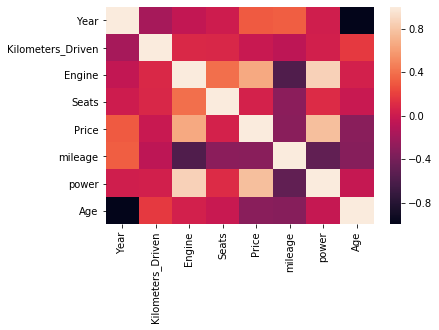

In [72]:
sns.heatmap(train.corr())

In [73]:
# Drop the new_price column as 90% of the rows have null values.

In [74]:
train.drop("new_price",axis=1,inplace=True)

In [75]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,mileage,power,Age,Brand,Engine_CC_Category
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998,5.0,1.75,26.60,58.16,9,Maru,Low
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582,5.0,12.50,19.67,126.20,4,Hyun,Medium
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199,5.0,4.50,18.20,88.70,8,Hond,Medium
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248,7.0,6.00,20.77,88.76,7,Maru,Medium
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,5.0,17.74,15.20,140.80,6,Audi,Medium


In [76]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Engine                0
Seats                 0
Price                 0
mileage               0
power                 0
Age                   0
Brand                 0
Engine_CC_Category    0
dtype: int64

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
Name                  6019 non-null object
Location              6019 non-null object
Year                  6019 non-null int64
Kilometers_Driven     6019 non-null int64
Fuel_Type             6019 non-null object
Transmission          6019 non-null object
Owner_Type            6019 non-null object
Engine                6019 non-null int32
Seats                 6019 non-null float64
Price                 6019 non-null float64
mileage               6019 non-null float64
power                 6019 non-null float64
Age                   6019 non-null int64
Brand                 6019 non-null object
Engine_CC_Category    6019 non-null category
dtypes: category(1), float64(4), int32(1), int64(3), object(6)
memory usage: 640.9+ KB


### Exploratory Data Analysis

#### Univariate Analysis

For Numerical Columns - We create Histogram (Distplot | Seaborn)

For Categorical Columns - Barplot | Countplot

In [77]:
# Price is the Target Column.

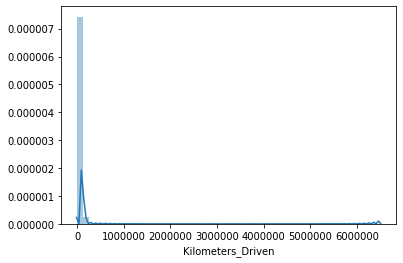

In [78]:
sns.distplot(train["Kilometers_Driven"])
plt.show()

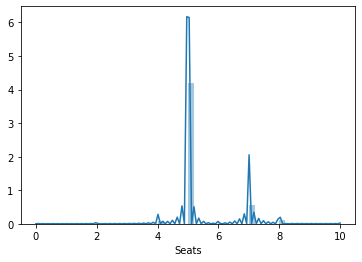

In [79]:
sns.distplot(train["Seats"])
plt.show()

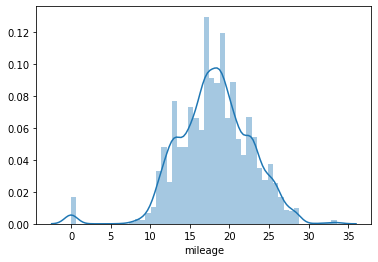

In [80]:
sns.distplot(train["mileage"])
plt.show()

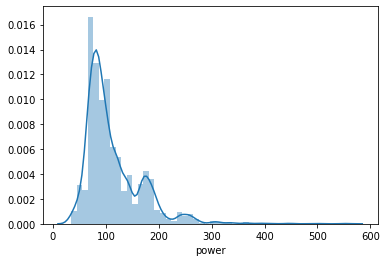

In [81]:
sns.distplot(train["power"])
plt.show()

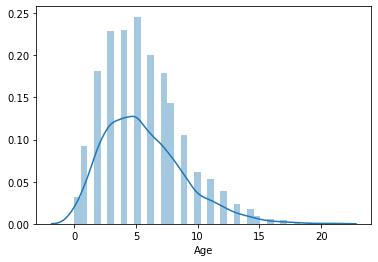

In [82]:
sns.distplot(train["Age"])
plt.show()

In [83]:
train.Brand.unique()

array(['Maru', 'Hyun', 'Hond', 'Audi', 'Niss', 'Toyo', 'Volk', 'Tata',
       'Land', 'Mits', 'Rena', 'Merc', 'BMW ', 'Mahi', 'Ford', 'Pors',
       'Dats', 'Jagu', 'Volv', 'Chev', 'Skod', 'Mini', 'Fiat', 'Jeep',
       'Smar', 'Amba', 'Isuz', 'ISUZ', 'Forc', 'Bent', 'Lamb'],
      dtype=object)

In [84]:
train.Brand.replace("ISUZ","Isuz",inplace=True)

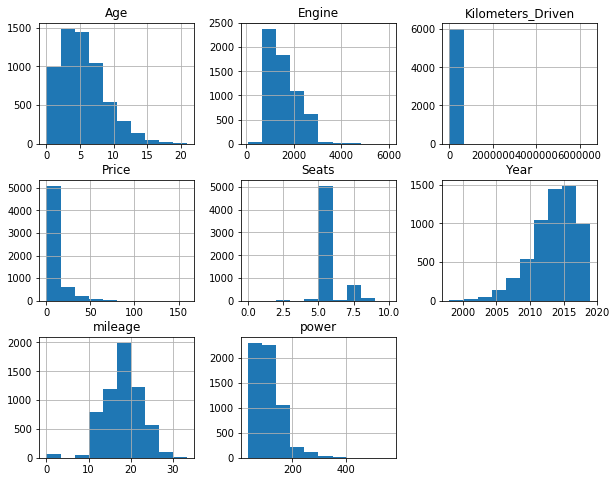

In [141]:
train.hist(figsize=[10,8])
plt.show()

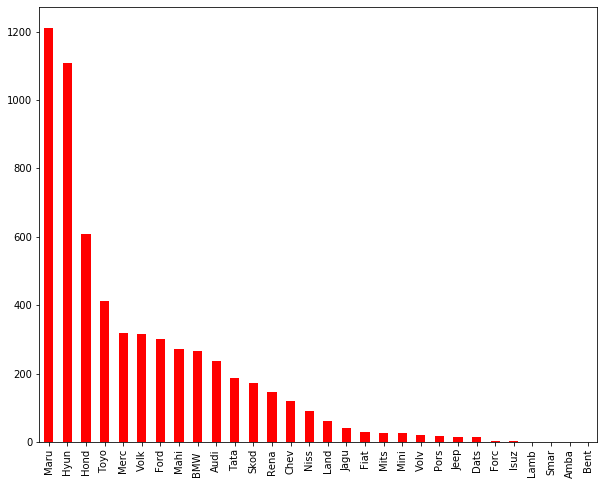

In [85]:
plt.figure(figsize=(10,8))
train.Brand.value_counts().plot(kind="bar",color="red")

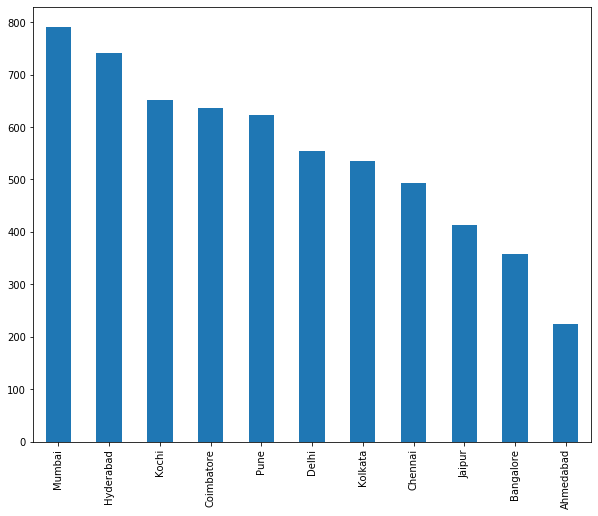

In [86]:
plt.figure(figsize=(10,8))
train.Location.value_counts().plot(kind="bar")
plt.show()

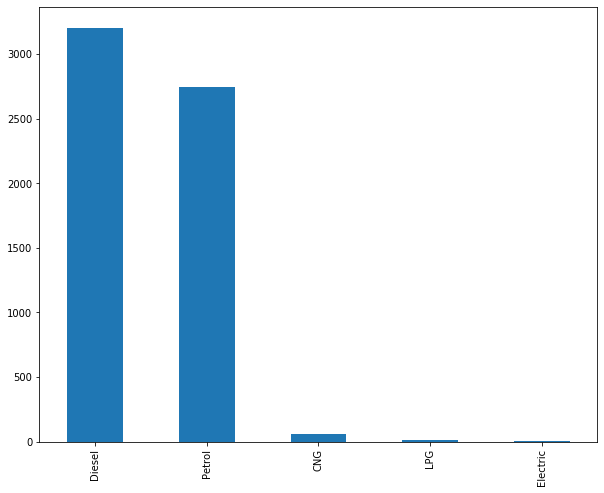

In [87]:
plt.figure(figsize=(10,8))
train.Fuel_Type.value_counts().plot(kind="bar")
plt.show()

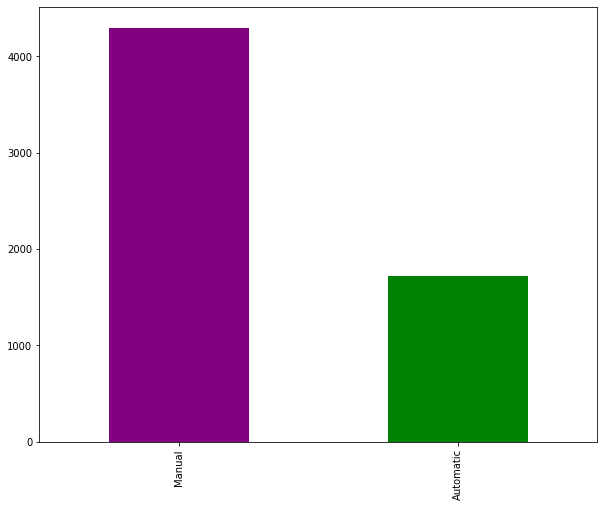

In [88]:
plt.figure(figsize=(10,8))
train.Transmission.value_counts().plot(kind="bar",color=["purple","green"])
plt.show()

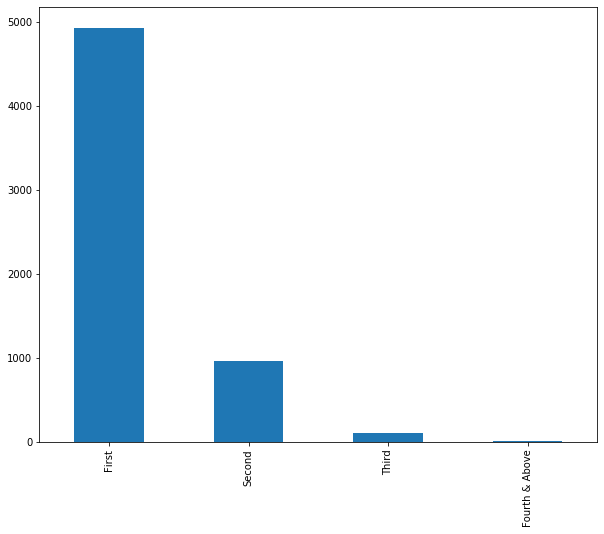

In [89]:
plt.figure(figsize=(10,8))
train.Owner_Type.value_counts().plot(kind="bar")
plt.show()

In [90]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,mileage,power,Age,Brand,Engine_CC_Category
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998,5.0,1.75,26.60,58.16,9,Maru,Low
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582,5.0,12.50,19.67,126.20,4,Hyun,Medium
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199,5.0,4.50,18.20,88.70,8,Hond,Medium
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248,7.0,6.00,20.77,88.76,7,Maru,Medium
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,5.0,17.74,15.20,140.80,6,Audi,Medium


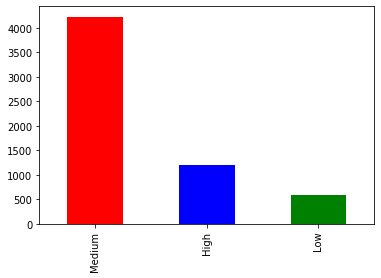

In [91]:
train.Engine_CC_Category.value_counts().plot(kind="bar",color=["red","blue","green"])

#### Bi-Variate Analysis

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
Name                  6019 non-null object
Location              6019 non-null object
Year                  6019 non-null int64
Kilometers_Driven     6019 non-null int64
Fuel_Type             6019 non-null object
Transmission          6019 non-null object
Owner_Type            6019 non-null object
Engine                6019 non-null int32
Seats                 6019 non-null float64
Price                 6019 non-null float64
mileage               6019 non-null float64
power                 6019 non-null float64
Age                   6019 non-null int64
Brand                 6019 non-null object
Engine_CC_Category    6019 non-null category
dtypes: category(1), float64(4), int32(1), int64(3), object(6)
memory usage: 640.9+ KB


For Numerical vs Numerical - Scatterplot

For Categorical vs Numerical - Boxplot | Violinplot

For Categorical vs Categorical - pd.crosstab | Table | Barplot

In [93]:
# Price is the target column so we are going to do all the bivariate analysis against the target variable.

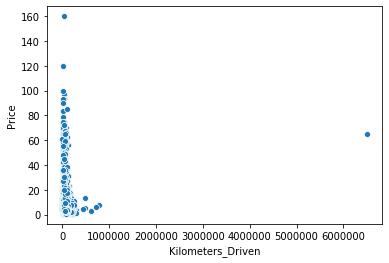

In [92]:
sns.scatterplot("Kilometers_Driven","Price",data=train)
plt.show()

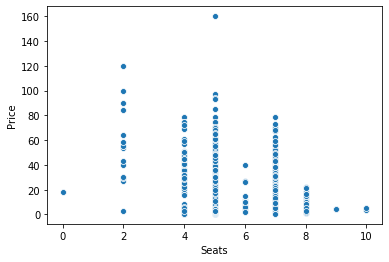

In [93]:
sns.scatterplot("Seats","Price",data=train)
plt.show()

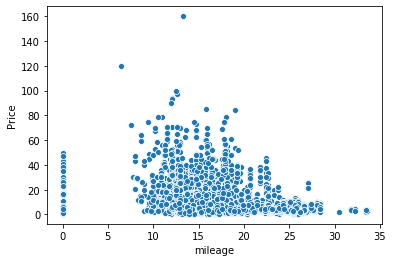

In [94]:
sns.scatterplot("mileage","Price",data=train)
plt.show()

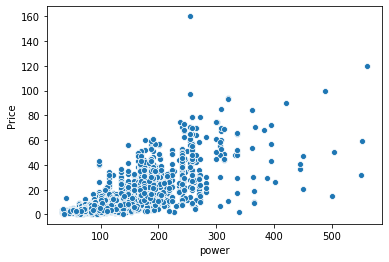

In [97]:
sns.scatterplot("power","Price",data=train)
plt.show()

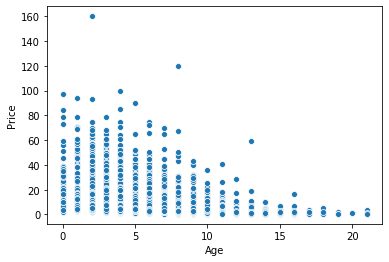

In [98]:
sns.scatterplot("Age","Price",data=train)
plt.show()

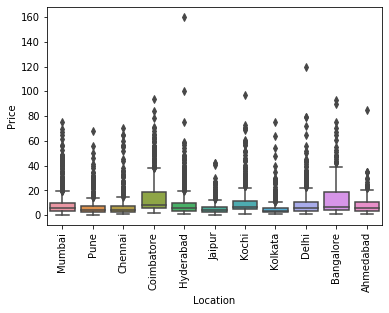

In [99]:
sns.boxplot("Location","Price",data=train)
plt.xticks(rotation=90)
plt.show()

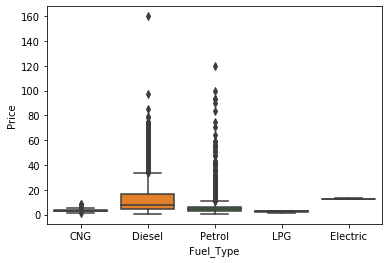

In [100]:
plt.Figure(figsize=(10,8))
sns.boxplot("Fuel_Type","Price",data=train)
plt.show()

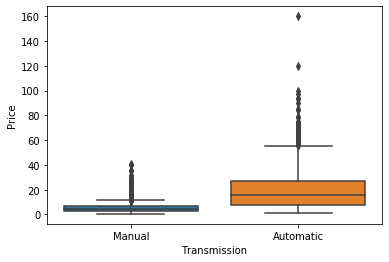

In [101]:
sns.boxplot("Transmission","Price",data=train)
plt.show()

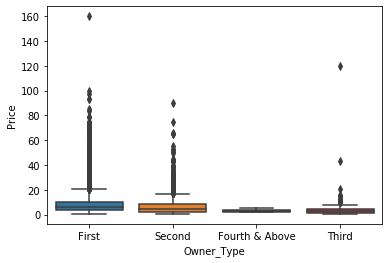

In [102]:
sns.boxplot("Owner_Type","Price",data=train)
plt.show()

In [103]:
train.Engine.unique()

array([ 998, 1582, 1199, 1248, 1968,  814, 1461, 2755, 1598, 1462, 1497,
       2179, 2477, 1498, 2143, 1995, 1984, 1197, 2494, 1798, 2696, 2698,
       1061, 1198, 2987,  796,  624, 1999, 1991, 2694, 1120, 2498,  799,
       2393, 1399, 1796, 2148, 1396, 1950, 4806, 1998, 1086, 1193, 2982,
       1493, 2967, 2993, 1196, 1799, 2497, 2354, 1373, 2996, 1591, 2894,
       5461, 1595,  936, 1997, 1896, 1390, 1364, 2199,  993,  999, 1405,
       2956, 1794,  995, 2496, 1599, 2400, 1495, 2523,  793, 4134, 1596,
       1395, 2953, 1586, 2362, 1496, 1368, 1298, 1956, 1299, 3498, 2835,
       1150, 3198, 1343, 1499, 1186, 1590, 2609, 2499, 2446, 1978, 2360,
       3436, 2198, 4367, 2706, 1422, 2979, 1969, 1489, 2489, 1242, 1388,
       1172, 2495, 1194, 3200, 1781, 1341, 2773, 3597, 1985, 2147, 1047,
       2999, 2995, 2997, 1948, 2359, 4395, 2349, 2720, 1468, 3197, 2487,
       1597, 2771,   72, 4951,  970, 2925, 2200, 5000, 2149, 5998, 2092,
       5204, 2112, 1797], dtype=int64)

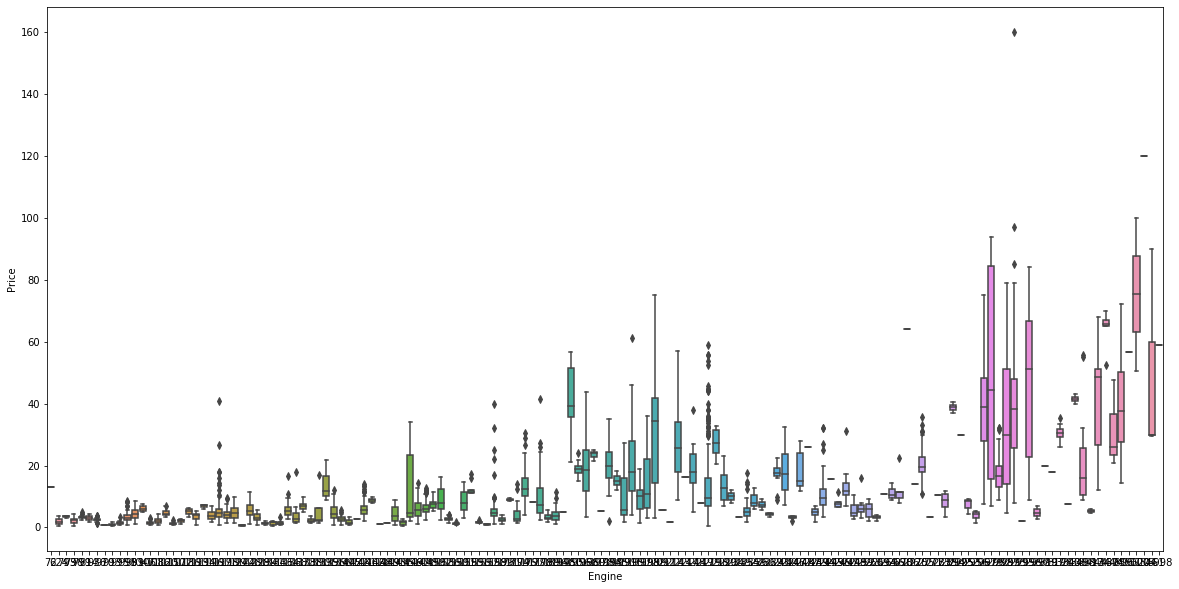

In [104]:
plt.figure(figsize=(20,10))
sns.boxplot("Engine","Price",data=train)
plt.show()

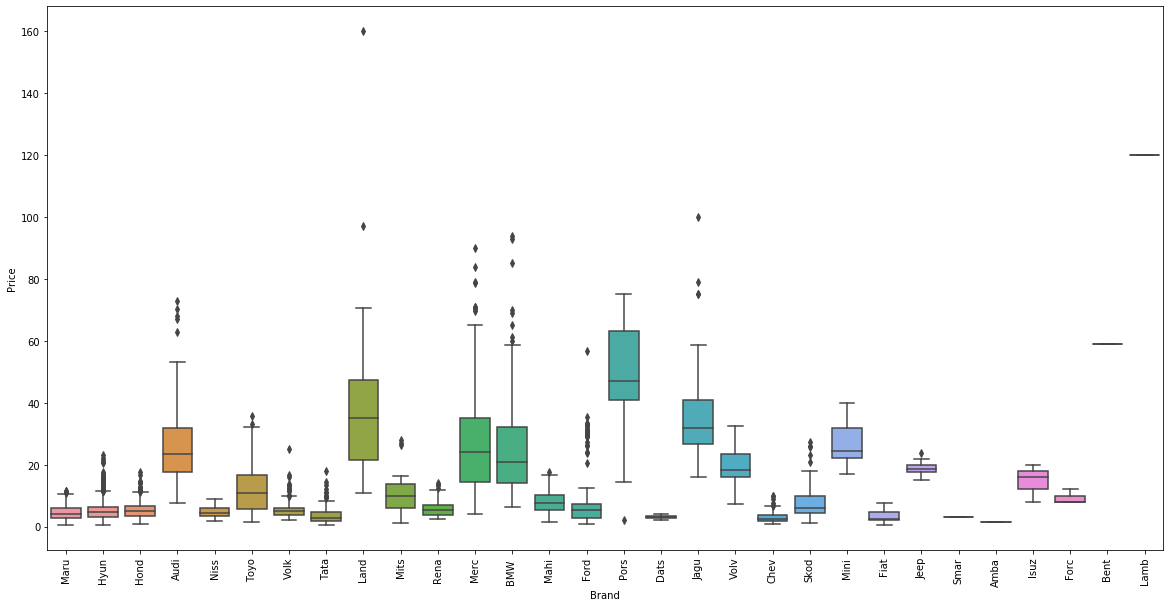

In [105]:
plt.figure(figsize=(20,10))
sns.boxplot("Brand","Price",data=train)
plt.xticks(rotation=90)
plt.show()

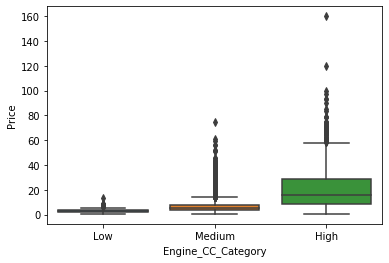

In [106]:
sns.boxplot("Engine_CC_Category","Price",data=train)

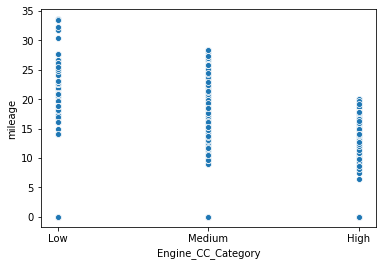

In [107]:
sns.scatterplot("Engine_CC_Category","mileage",data=train)

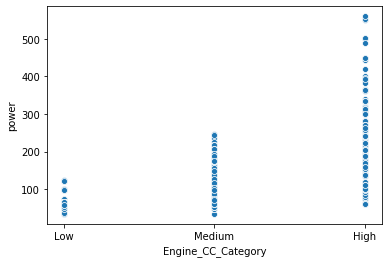

In [108]:
sns.scatterplot("Engine_CC_Category","power",data=train)

#### One Hot Encoding To Make a Dummy Train

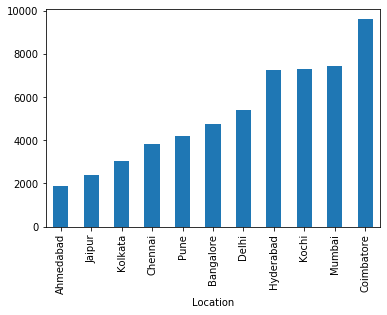

In [109]:
train.groupby("Location")["Price"].sum().sort_values().plot(kind="bar")

In [95]:
train.Location = np.where(train.Location.isin(["Coimbatore"]),"Coimbatore","Others")

In [96]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,mileage,power,Age,Brand,Engine_CC_Category
0,Maruti Wagon R LXI CNG,Others,2010,72000,CNG,Manual,First,998,5.0,1.75,26.60,58.16,9,Maru,Low
1,Hyundai Creta 1.6 CRDi SX Option,Others,2015,41000,Diesel,Manual,First,1582,5.0,12.50,19.67,126.20,4,Hyun,Medium
2,Honda Jazz V,Others,2011,46000,Petrol,Manual,First,1199,5.0,4.50,18.20,88.70,8,Hond,Medium
3,Maruti Ertiga VDI,Others,2012,87000,Diesel,Manual,First,1248,7.0,6.00,20.77,88.76,7,Maru,Medium
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,5.0,17.74,15.20,140.80,6,Audi,Medium


In [97]:
# We have to make a dummy train to perform Scaling.

dummy_train = pd.get_dummies(train.drop(["Name","Year","Engine"],axis=1))
dummy_train.head()

,Kilometers_Driven,Seats,Price,mileage,power,Age,Location_Coimbatore,Location_Others,Fuel_Type_CNG,Fuel_Type_Diesel,...,Brand_Rena,Brand_Skod,Brand_Smar,Brand_Tata,Brand_Toyo,Brand_Volk,Brand_Volv,Engine_CC_Category_Low,Engine_CC_Category_Medium,Engine_CC_Category_High
0,72000,5.0,1.75,26.60,58.16,9,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,41000,5.0,12.50,19.67,126.20,4,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,46000,5.0,4.50,18.20,88.70,8,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,87000,7.0,6.00,20.77,88.76,7,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,40670,5.0,17.74,15.20,140.80,6,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


#### Dummy Train Model

In [98]:
x = dummy_train.drop("Price",axis=1)
y = dummy_train.Price

#### Linear Regression Model

In [99]:
lr = LinearRegression()

In [100]:
pred_price = lr.fit(x,y).predict(x)

In [101]:
print("r2_score is: ",r2_score(y,pred_price))    # It has a 77 percent power of prediction.

r2_score is:  0.7749814469244897


In [102]:
print("rmse is: ",np.sqrt(mean_squared_error(y,pred_price)))  # It means that my predicted price is deviating by INR 5.3L.

rmse is:  5.306672964314231


In [103]:
lr.coef_

array([ 2.23706617e-06, -1.18043180e-01, -1.63448420e-01,  9.13202798e-02,
       -1.00001904e+00,  8.41772800e-01, -8.41772800e-01, -2.95999928e+00,
       -1.67678391e+00,  8.51160274e+00, -5.77075595e-01, -3.29774396e+00,
       -6.08285768e-02,  6.08285768e-02, -1.92855260e-01,  4.17004428e-01,
       -7.44757946e-01,  5.20608778e-01,  3.10883800e+00,  3.01390327e+00,
        2.13346639e+00,  1.02968520e+01, -6.77423698e+00, -8.02395530e+00,
       -6.57398870e+00, -9.66400366e+00, -5.34868797e+00, -6.70924472e+00,
       -6.01570888e+00, -9.72440097e+00,  8.82445881e+00, -5.08751033e+00,
        6.43498959e+01,  1.51394504e+01, -9.17483453e+00, -5.21946124e+00,
        3.29353884e+00,  9.06206612e+00, -5.61992529e+00, -6.11589904e+00,
        1.45813561e+01, -6.95860098e+00, -6.24314374e+00, -8.72945397e+00,
       -7.22296272e+00, -4.99202519e+00, -6.51126973e+00, -3.09451195e+00,
        4.58869888e-01, -1.23850750e+00,  7.79637616e-01])

In [104]:
lr.intercept_

16.678613955695656

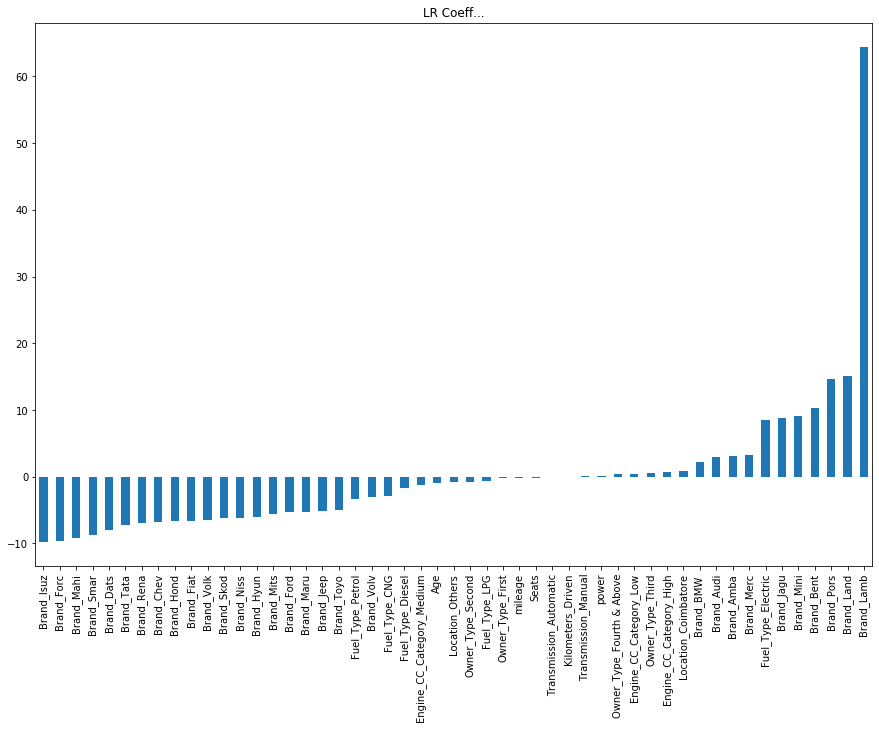

In [105]:
plt.figure(figsize=[15,10])
pd.Series(lr.coef_,x.columns).sort_values().plot(kind="bar",title="LR Coeff...")
plt.show()

#### Ridge Regression Model

In [106]:
from sklearn.linear_model import Ridge

In [107]:
r = Ridge(alpha=0.5,random_state=123)

In [108]:
ridge_pred = r.fit(x,y).predict(x)

In [109]:
r2_score(y,ridge_pred)

0.7742625200081492

In [110]:
np.sqrt(mean_squared_error(y,ridge_pred))

5.315143527182306

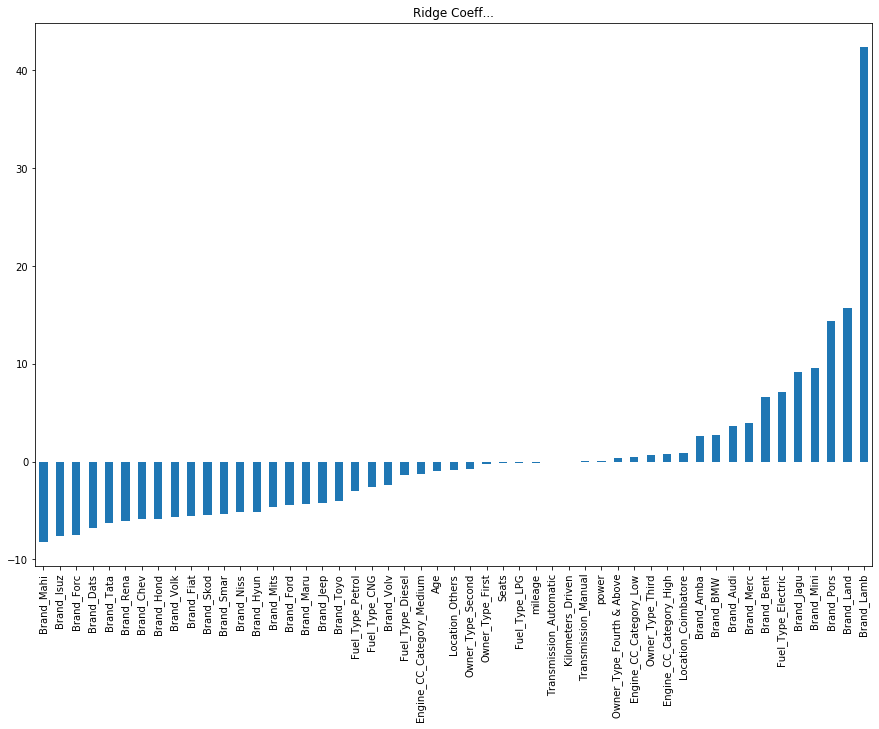

In [111]:
plt.figure(figsize=[15,10])
pd.Series(r.coef_,x.columns).sort_values().plot(kind="bar",title="Ridge Coeff...")
plt.show()

#### Lasso Regression Model

In [112]:
from sklearn.linear_model import Lasso

In [113]:
L = Lasso(alpha=0.05,random_state=123)

In [114]:
lasso_pred = L.fit(x,y).predict(x)

In [115]:
r2_score(y,lasso_pred)

0.7409809134140173

In [116]:
np.sqrt(mean_squared_error(y,lasso_pred))

5.693496315997064

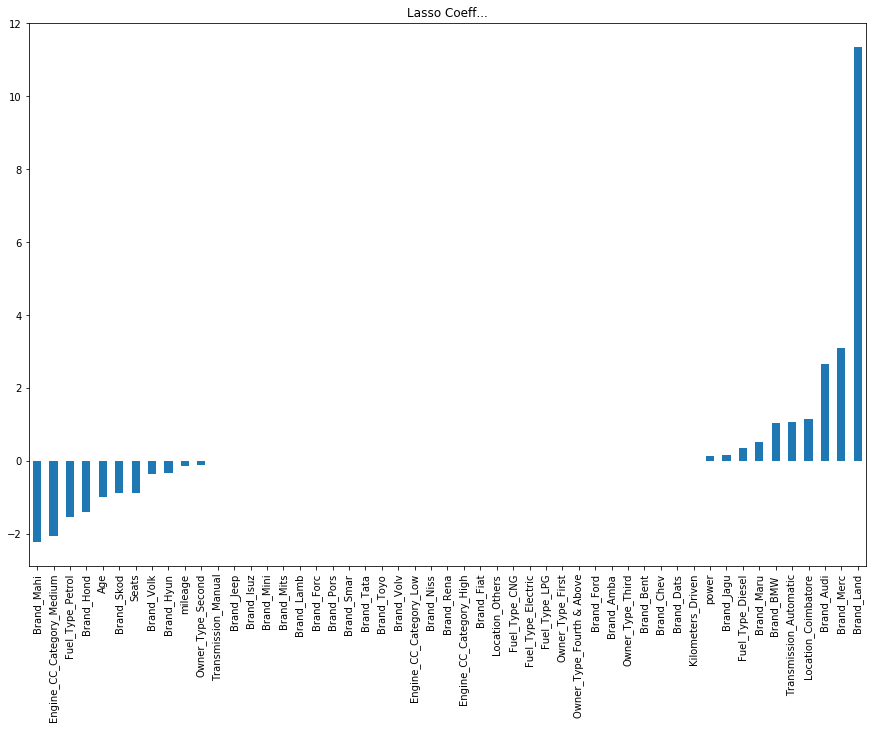

In [117]:
plt.figure(figsize=[15,10])
pd.Series(L.coef_,x.columns).sort_values().plot(kind="bar",title="Lasso Coeff...")
plt.show()

In [118]:
# From the above graph also we can do feature selection.

#### ElasticNet Model

In [119]:
from sklearn.linear_model import ElasticNet

In [120]:
Enet = ElasticNet(alpha=0.05,random_state=123)

In [121]:
Enet_pred = Enet.fit(x,y).predict(x)

In [122]:
r2_score(y,Enet_pred)

0.7307783189323924

In [123]:
np.sqrt(mean_squared_error(y,Enet_pred))

5.804544915050877

#### Random Forest Model

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
rf = RandomForestRegressor()

In [126]:
rf_pred = rf.fit(x,y).predict(x)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [127]:
r2_score(y,rf_pred)

0.9792630109902016

In [128]:
np.sqrt(mean_squared_error(y,rf_pred))

1.6109646437769238

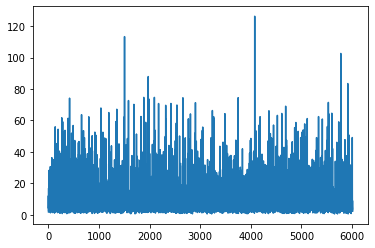

In [139]:
plt.plot(rf_pred)

#### Decision Tree Model

In [129]:
from sklearn.tree import DecisionTreeRegressor

In [130]:
dtree = DecisionTreeRegressor()

In [131]:
pred_dtree = dtree.fit(x,y).predict(x)

In [132]:
r2_score(y,pred_dtree)

0.9999174630595964

In [133]:
np.sqrt(mean_squared_error(y,pred_dtree))

0.10163360794620785

#### Gradient Boosting Regressor Model

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

In [135]:
gbr = GradientBoostingRegressor()

In [136]:
pred_gbr = gbr.fit(x,y).predict(x)

In [137]:
r2_score(y,pred_gbr)

0.9375004855665445

In [153]:
np.sqrt(mean_squared_error(y,pred_gbr))

2.796736058542873

#### Bagging Model

In [154]:
from sklearn.ensemble import BaggingRegressor

In [155]:
b = BaggingRegressor()

In [156]:
# ASSUMPTION CHECK

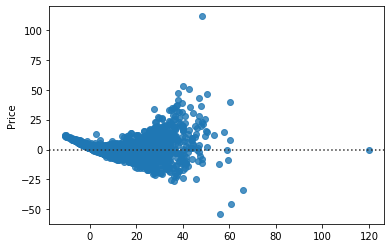

In [157]:
residual = y - pred_price
sns.residplot(x=pred_price,y=residual)  # The residuals show a heteroscedastic pattern. It doesnt meet the assumption.

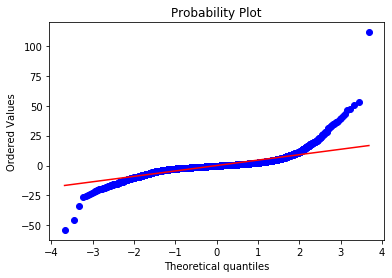

In [158]:
scipy.probplot(residual,plot=pylab)
plt.show() # It says that the residuals are not normally distributed. # Not normal. It doesnt meet the assumption.

In [159]:
# H0- The data is normal 
# H1- The data is not normal
# Shapiro test 
alpha = 0.05
teststats,pvalue = shapiro(residual)
print("Teststats: ",teststats)
print("Pvalue: ",pvalue)

Teststats:  0.7327841520309448
Pvalue:  0.0


C:\Users\Toshiba\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [160]:
if (pvalue>alpha):
    print("We fail to reject the null hypothesis")
else:
    print("We will reject the null hypothesis")

We will reject the null hypothesis


In [161]:
# The data is not normal.

In [162]:
# Heteroscedasticity

In [163]:
het_goldfeldquandt(residual,dummy_train.drop("Price",axis=1))

(0.9170042673574091, 0.9908372586665035, 'increasing')

In [164]:
# The residuals are heteroscedastic in nature.

In [165]:
# Backward Elimination - Feature Selection 

In [166]:
model = sm.OLS(y,x.drop(["Seats","Fuel_Type_CNG","Fuel_Type_Diesel","Fuel_Type_LPG","Owner_Type_Fourth & Above",
                         "Owner_Type_First","Owner_Type_Third","Brand_Amba","Brand_Audi","Brand_Bent",
                         "Brand_Merc"],axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     555.7
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:46:04   Log-Likelihood:                -18590.
No. Observations:                6019   AIC:                         3.726e+04
Df Residuals:                    5981   BIC:                         3.751e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Kilometers_Driven          2.238e-06   7.74e-07      2.891      0.004     7.2e-07    3.76e-06
mileage                      -0.1569      0.025     -6.259      0.000      -0.206      -0.108
power                         0.0917      0.003     34.518      0.000       0.087       0.097
Age                          -0.9867      0.026    -38.465      0.000      -1.037      -0.936
Location_Coimbatore           7.2669      0.319     22.746      0.000       6.641       7.893
Location_Others               5.5756      0.309     18.030      0.000       4.969       6.182
Fuel_Type_Electric           10.4097      3.787      2.748      0.006       2.985      17.834
Fuel_Type_Petrol             -1.5113      0.196     -7.730      0.000      -1.895      -1.128
Transmission_Automatic        6.3640      0.305     20.856      0.000       5.766       6.962
Transmission_Manual           6.4784      0.322     20.091      0.000       5.846       7.111
Owner_Type_Second            -0.6049      0.197     -3.074      0.002      -0.991      -0.219
Brand_BMW                    -1.0435      0.413     -2.526      0.012      -1.854      -0.234
Brand_Chev                   -9.9771      0.599    -16.654      0.000     -11.151      -8.803
Brand_Dats                  -11.2743      1.540     -7.322      0.000     -14.293      -8.256
Brand_Fiat                   -9.7578      1.070     -9.118      0.000     -11.856      -7.660
Brand_Forc                  -13.0404      3.097     -4.210      0.000     -19.112      -6.969
Brand_Ford                   -8.5307      0.456    -18.706      0.000      -9.425      -7.637
Brand_Hond                   -9.9492      0.404    -24.621      0.000     -10.741      -9.157
Brand_Hyun                   -9.2275      0.388    -23.768      0.000      -9.989      -8.466
Brand_Isuz                  -12.8805      3.095     -4.161      0.000     -18.948      -6.813
Brand_Jagu                    5.6647      0.880      6.435      0.000       3.939       7.390
Brand_Jeep                   -8.2182      1.421     -5.783      0.000     -11.004      -5.432
Brand_Lamb                   62.0242      5.412     11.460      0.000      51.414      72.634
Brand_Land                   11.9782      0.734     16.311      0.000      10.539      13.418
Brand_Mahi                  -12.5221      0.475    -26.371      0.000     -13.453     -11.591
Brand_Maru                   -8.4740      0.407    -20.830      0.000      -9.271      -7.676
Brand_Mini                    5.9221      1.082      5.471      0.000       3.800       8.044
Brand_Mits                   -8.8301      1.074     -8.218      0.000     -10.936      -6.724
Brand_Niss                   -9.3175      0.660    -14.126      0.000     -10.611      -8.024
Brand_Pors                   11.5002      1.307      8.801      0.000      

#### Scaling/Normalisation through Standar Scaler

In [167]:
ss = StandardScaler()

In [168]:
scaled_train = pd.DataFrame(ss.fit_transform(dummy_train),columns=dummy_train.columns)

In [169]:
scaled_train.Price.describe()

count    6.019000e+03
mean     2.123055e-17
std      1.000083e+00
min     -8.080342e-01
25%     -5.345021e-01
50%     -3.432084e-01
75%      4.206062e-02
max      1.345497e+01
Name: Price, dtype: float64

#### Scaled Train Model

In [170]:
# Defining x,y
x = scaled_train.drop("Price",axis=1)
y = scaled_train.Price

In [171]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.2)

In [172]:
xtrain.shape

(4815, 51)

In [173]:
xtest.shape

(1204, 51)

In [174]:
# LR - Scaled

In [175]:
LR = LinearRegression()

In [176]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
ypredict = lr.predict(xtest)

In [178]:
r2_score(ytest,ypredict)

-2187.4403404153177

In [179]:
np.sqrt(mean_squared_error(ytest,ypredict))

45.785262338860164

In [180]:
# Ridge - Scaled

In [181]:
ridge = Ridge(alpha=0.05,random_state=123)

In [182]:
ridge_pred = ridge.fit(xtrain,ytrain).predict(xtest)

In [183]:
r2_score(ytest,ridge_pred)

0.7679748818197767

In [184]:
np.sqrt(mean_squared_error(ytest,ridge_pred))

0.4714393750273946

In [185]:
RF = RandomForestRegressor()

In [186]:
RF_pred = RF.fit(xtrain,ytrain).predict(xtest)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [187]:
r2_score(ytest,RF_pred)

0.8266612369124751

In [188]:
np.sqrt(mean_squared_error(ytest,RF_pred))

0.40747990635639963

In [195]:
train.shape

(6019, 15)

In [189]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,mileage,power,Age,Brand,Engine_CC_Category
0,Maruti Wagon R LXI CNG,Others,2010,72000,CNG,Manual,First,998,5.0,1.75,26.60,58.16,9,Maru,Low
1,Hyundai Creta 1.6 CRDi SX Option,Others,2015,41000,Diesel,Manual,First,1582,5.0,12.50,19.67,126.20,4,Hyun,Medium
2,Honda Jazz V,Others,2011,46000,Petrol,Manual,First,1199,5.0,4.50,18.20,88.70,8,Hond,Medium
3,Maruti Ertiga VDI,Others,2012,87000,Diesel,Manual,First,1248,7.0,6.00,20.77,88.76,7,Maru,Medium
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,5.0,17.74,15.20,140.80,6,Audi,Medium


### Statistical Tests

In [ ]:
# Null Hypothesis(H0): The performance of Low engine CC category = the performance of medium engine CC category = the performance of high engine CC category
# Alternate Hypothesis(H1): The performance of all engine CC categories are not equal.

In [ ]:
# Null Hypothesis(H0): The average price of all Owner Types are equal.
# Alternate Hypothesis(H1): The average price of all Owner Types are not equal.

In [190]:
# Null Hypothesis(H0): The average price of all Fuel Types are equal.
# Alternate Hypothesis(H1): The average price of all Fuel Types are not equal.

In [191]:
# Null Hypothesis(H0): The average price of all Engine CC Category are equal.
# Alternate Hypothesis(H1): The average price of all Engine CC Category are not equal.

### Principal Component Analysis

In [87]:
from sklearn.decomposition import PCA

In [88]:
train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Engine', 'Seats', 'Price', 'mileage',
       'power', 'Age', 'Brand', 'Engine_CC_Category'],
      dtype='object')

In [89]:
X = train.drop(["Name","Location","Year","Price"],axis=1)
Y = train.Price

In [90]:
X.mean()

Kilometers_Driven    58738.380296
Engine                1618.738827
Seats                    5.276790
mileage                 18.134966
power                  112.883539
Age                      5.641801
dtype: float64

In [92]:
centered_X = X - X.mean()

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [ ]:
pca = PCA()
pcs.fit(centered_X)

In [1]:
# make a column of small big medium sized car